In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from upsetplot import plot as up_plt
from datetime import datetime

plt.style.use('ggplot')
%matplotlib inline

In [2]:
ALLEN_AI_RES_PATH = "../res/allenai/metadata.csv"

In [3]:
df_allen = pd.read_csv(ALLEN_AI_RES_PATH)

print(len(df_allen.index))
df_allen.head(5)

44220


,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal,NaN,NaN,False,custom_license
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license
4,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license


In [4]:
df_allen.isna().sum().sort_values(ascending=False)

Microsoft Academic Paper ID    43256
WHO #Covidence                 42453
pubmed_id                      21277
pmcid                          20901
sha                            15758
full_text_file                 11391
journal                        11047
publish_time                   10023
abstract                        8414
doi                             3470
authors                         3146
title                            224
has_full_text                      0
license                            0
source_x                           0
dtype: int64

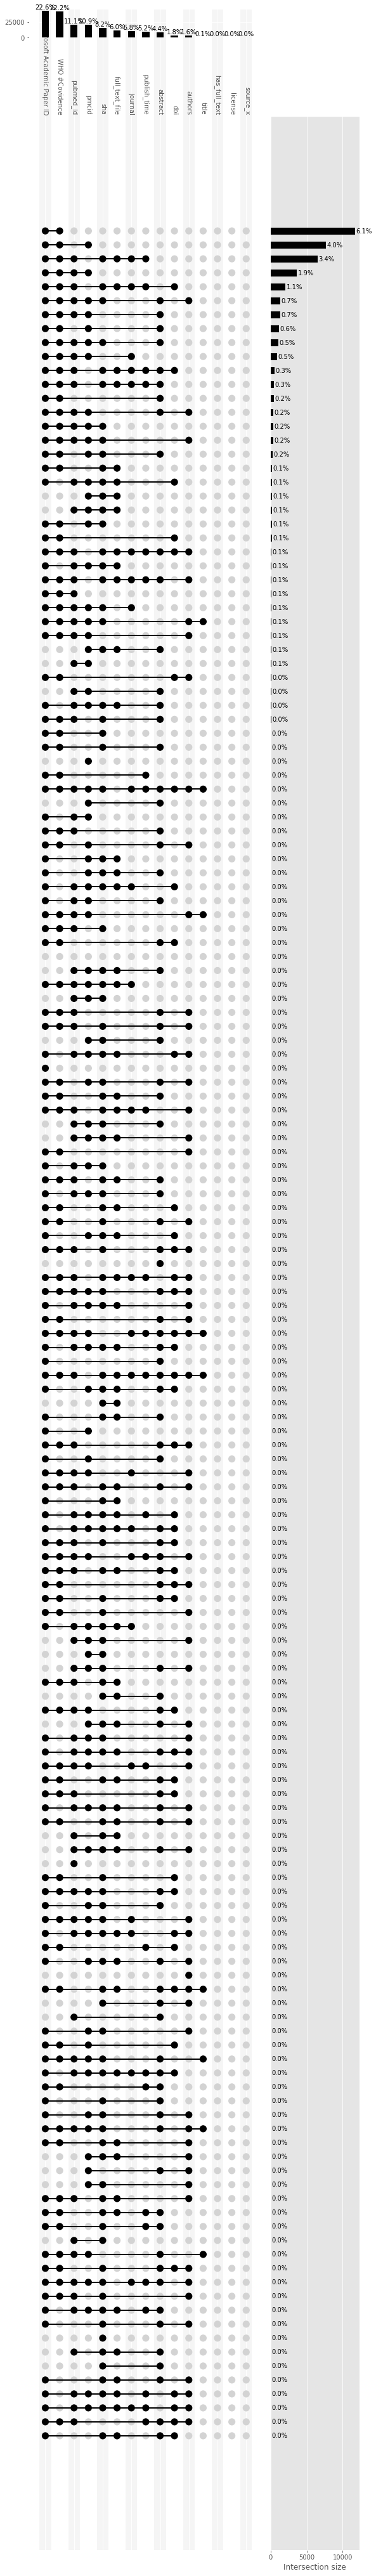

In [5]:
mis_vals = df_allen.isna().groupby(df_allen.columns.tolist()).size()
up_plt(mis_vals, orientation='vertical', show_percentages=True, sort_by='cardinality')
plt.show()

PMC         22309
Elsevier    19471
WHO          1154
biorxiv       605
medrxiv       445
CZI           153
PMC_new        83
Name: source_x, dtype: int64

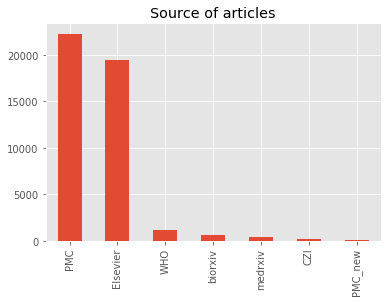

In [6]:
df_allen.source_x.value_counts().plot(kind='bar', title='Source of articles')
df_allen.source_x.value_counts()

In [7]:
def map_to_parsed_time(row):
    str_date = row['publish_time']
    if pd.isna(str_date):
        return np.nan
    
    try:
        if row['source_x'] in ['Elsevier', 'biorxiv', 'medrxiv']:
            return datetime.strptime(str_date, '%Y-%m-%d')
        elif row['source_x'] in ['CZI', 'WHO']:
            if len(str_date) == 4:
                return datetime.strptime(str_date, '%Y')
            elif len(str_date) == 10:
                return datetime.strptime(str_date, '%Y-%m-%d')
        elif row['source_x'] == 'PMC':
            if any([x for x in ['Spring', 'Autumn', 'Winter', 'Summer', 'Fall'] if x in str_date]):
                str_date = str_date[:4]
            if len(str_date) == 4:
                return datetime.strptime(str_date, '%Y')
            if len(str_date) == 12:
                # e.g. 2016 Jun-Dec ---> 2016 Dec
                str_date = str_date[:5] + str_date[-3:]
            if len(str_date) == 8:
                return datetime.strptime(str_date, '%Y %b')
            if len(str_date) > 12:
                # e.g. 2011 May 10 Jul-Sep ???
                str_date = str_date[:10].strip()
            if len(str_date) == 10:
                str_date = str_date[:9] + '0' + str_date[-1:]
            if len(str_date) == 11 and str_date[-2:].isdigit():
                if '-' in str_date:
                    # '2020-02-204' ??
                    return datetime.strptime(str_date[:7], '%Y-%m')
                return datetime.strptime(str_date, '%Y %b %d')
        elif row['source_x'] == 'PMC_new':
            if str_date[0] == '[':
                str_date = str_date[2:12]
            return datetime.strptime(str_date, '%Y-%m-%d')
        print(str_date, row['source_x'] )
    except Exception as e:
        print('Invalid date ' + str_date, '--', e)
    return np.nan

df_allen['parsed_time'] = df_allen.apply(map_to_parsed_time, axis=1)   

Invalid date 2018 Feb 31 -- day is out of range for month
Invalid date 2018 Jun 31 -- day is out of range for month
Invalid date 2019 Feb 30 -- day is out of range for month
Invalid date 2014 Apr 31 -- day is out of range for month
Invalid date 2015 Feb 29 -- day is out of range for month
Invalid date 2017 Apr 31 -- day is out of range for month
Invalid date 2019 Feb 30 -- day is out of range for month
Invalid date 2011 Sep 31 -- day is out of range for month
Invalid date 2014 Feb 30 -- day is out of range for month
Invalid date 2020 Feb 30 -- day is out of range for month
Invalid date 2010 Apr 31 -- day is out of range for month


NA 10034


parsed_time
2020-12-31    3098
2019-12-31    2867
2018-12-31    2562
2017-12-31    2349
2016-12-31    2332
2015-12-31    2199
2014-12-31    1960
2013-12-31    1719
2012-12-31    1506
2011-12-31    1375
Name: source_x, dtype: int64

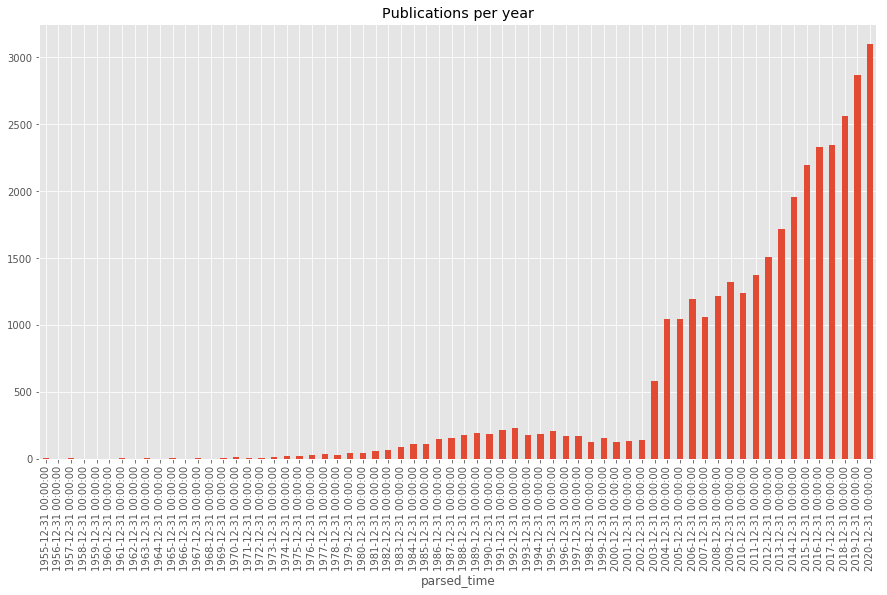

In [8]:
df_allen.set_index('parsed_time').resample('y').count()['source_x'].plot(kind='bar', figsize=(15,8), title='Publications per year')
print('NA', df_allen.parsed_time.isna().sum())
df_allen.set_index('parsed_time').resample('y').count()['source_x'].sort_values(ascending=False).head(10)

PLoS One                          1562
Virology                           816
Emerg Infect Dis                   749
The Lancet                         580
Viruses                            554
Virus Research                     528
Veterinary Microbiology            486
Sci Rep                            486
Vaccine                            450
Journal of Virological Methods     416
Name: journal, dtype: int64

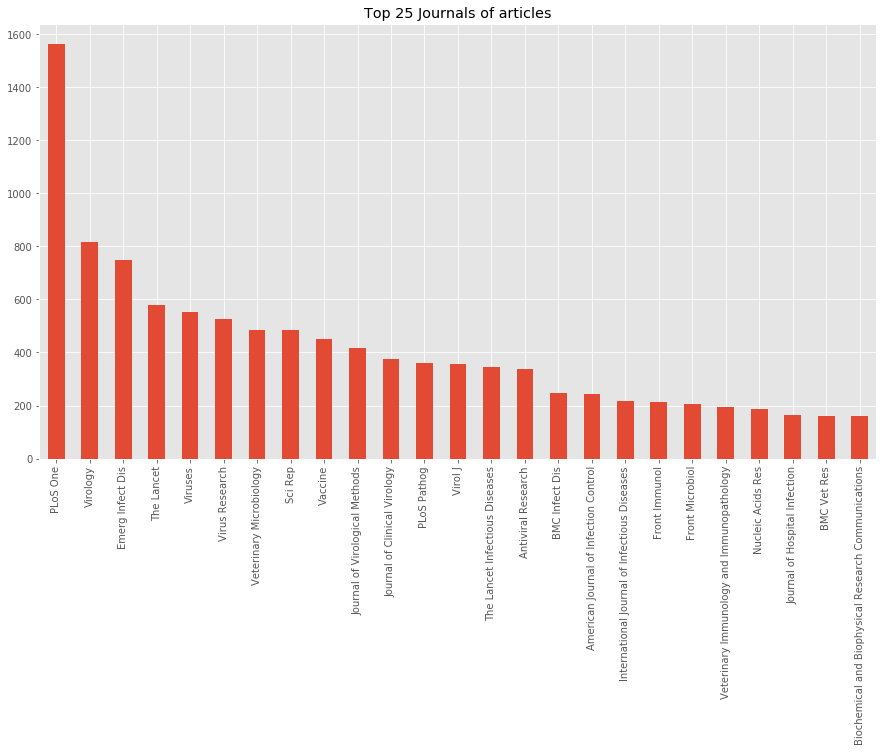

In [9]:
df_allen.journal.value_counts().head(25).plot(kind='bar', title='Top 25 Journals of articles', figsize=(15,8))
df_allen.journal.value_counts().head(10)